In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
our_data = pd.read_csv('filtered_df.csv')
our_data

,GENE_NAME,ACCESSION_NUMBER,GENE_CDS_LENGTH,HGVSG,HGVSC,MUTATION_CDS,CDNA_POSITION,MUTATION_EVENT,BASE_ALLELE,MUTANT_ALLELE,...,MT_AA_1,MT_AA_3,MUTATION_SOMATIC_STATUS,PRIMARY_SITE,PRIMARY_HISTOLOGY,SAMPLE_TYPE,TUMOUR_ORIGIN,GENOMIC_MUTATION_ID,PUBMED_PMID,CANCER_TYPE
0,CDKN2A,ENST00000498124.1,504,9:g.21971110G>T,ENST00000498124.1:c.249C>A,c.249C>A,249,C>A,C,A,...,Q,Gln,Variant of unknown origin,pleura,mesothelioma,surgery fresh/frozen,primary,COSV58684711,12117769.0,Other
1,CDKN2A,ENST00000498124.1,504,9:g.21971171A>G,ENST00000498124.1:c.188T>C,c.188T>C,188,T>C,T,C,...,P,Pro,Variant of unknown origin,skin,malignant melanoma,surgery - NOS,metastasis,COSV58716983,20703244.0,Skin Cancer
2,CDKN2A,ENST00000498124.1,504,9:g.21971135G>A,ENST00000498124.1:c.224C>T,c.224C>T,224,C>T,C,T,...,L,Leu,Variant of unknown origin,lung,carcinoma,surgery-fixed,metastasis,COSV58688496,26164066.0,Carcinoma
3,CDKN2A,ENST00000498124.1,504,9:g.21974742C>T,ENST00000498124.1:c.86G>A,c.86G>A,86,G>A,G,A,...,Q,Gln,Variant of unknown origin,upper aerodigestive tract,carcinoma,surgery-fixed,NS,COSV58704956,19690981.0,Carcinoma
4,CDKN2A,ENST00000498124.1,504,9:g.21971203C>G,ENST00000498124.1:c.156G>C,c.156G>C,156,G>C,G,C,...,I,Ile,Variant of unknown origin,breast,carcinoma,cell-line,NS,COSV58687020,19593635.0,Carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,CDKN2A,ENST00000498124.1,504,9:g.21971117G>A,ENST00000498124.1:c.242C>T,c.242C>T,242,C>T,C,T,...,L,Leu,Confirmed somatic variant,skin,malignant melanoma,surgery-fixed,metastasis,COSV58683884,28481359.0,Skin Cancer
1347,CDKN2A,ENST00000498124.1,504,9:g.21971109C>T,ENST00000498124.1:c.250G>A,c.250G>A,250,G>A,G,A,...,N,Asn,Confirmed somatic variant,central nervous system,primitive neuroectodermal tumour-medulloblastoma,NS,NS,COSV58683289,NaN,Brain Tumor
1348,CDKN2A,ENST00000498124.1,504,9:g.21970992G>T,ENST00000498124.1:c.367C>A,c.367C>A,367,C>A,C,A,...,N,Asn,Confirmed somatic variant,lung,carcinoma,surgery-fixed,primary,COSV58709909,28481359.0,Carcinoma
1349,CDKN2A,ENST00000498124.1,504,9:g.21971108T>C,ENST00000498124.1:c.251A>G,c.251A>G,251,A>G,A,G,...,G,Gly,Confirmed somatic variant,central nervous system,glioma,surgery fresh/frozen,NS,COSV58688961,28263318.0,Brain Tumor


In [3]:
columns_to_drop = ['GENE_NAME', ' ACCESSION_NUMBER', ' HGVSC', ' HGVSG', 'HGVSP', 'GENOMIC_MUTATION_ID', 'PUBMED_PMID']

data = our_data.drop(columns=columns_to_drop, axis=1)

### Summary Statistics and EDA

In [4]:
unique_counts = data.nunique()
print("\nNumber of unique values in each column:\n", unique_counts)


Number of unique values in each column:
  GENE_CDS_LENGTH             1
 MUTATION_CDS              408
CDNA_POSITION              259
MUTATION_EVENT              12
BASE_ALLELE                  4
MUTANT_ALLELE                4
MUTATION_AA                397
WT_AA_1                     19
WT_AA_3                     19
CODON_POSITION             144
MT_AA_1                     20
MT_AA_3                     20
MUTATION_SOMATIC_STATUS      3
PRIMARY_SITE                31
PRIMARY_HISTOLOGY           35
SAMPLE_TYPE                 14
TUMOUR_ORIGIN                5
CANCER_TYPE                  7
dtype: int64


In [5]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nValue counts for {column}:\n{data[column].value_counts()}\n")


Value counts for  MUTATION_CDS:
c.247C>T    140
c.341C>T     74
c.250G>A     37
c.322G>T     37
c.250G>T     33
           ... 
c.235A>G      1
c.52A>C       1
c.205G>A      1
c.16G>T       1
c.367C>A      1
Name:  MUTATION_CDS, Length: 408, dtype: int64


Value counts for MUTATION_EVENT:
C>T    397
G>A    297
G>T    179
G>C     94
C>A     66
A>G     64
C>G     59
T>C     49
T>A     42
A>T     38
A>C     34
T>G     32
Name: MUTATION_EVENT, dtype: int64


Value counts for BASE_ALLELE:
G    570
C    522
A    136
T    123
Name: BASE_ALLELE, dtype: int64


Value counts for MUTANT_ALLELE:
T    614
A    405
C    177
G    155
Name: MUTANT_ALLELE, dtype: int64


Value counts for MUTATION_AA:
p.H83Y     140
p.P114L     74
p.D84N      37
p.D108Y     37
p.D84Y      33
          ... 
p.T18P       1
p.E69K       1
p.G6W        1
p.G55C       1
p.H123N      1
Name: MUTATION_AA, Length: 397, dtype: int64


Value counts for WT_AA_1:
D    235
A    204
H    202
P    176
R    103
G     97
L     74
E    

In [6]:
summary_stats = data[categorical_columns].describe()
print("Summary Statistics for Categorical Columns:\n", summary_stats)

Summary Statistics for Categorical Columns:
         MUTATION_CDS MUTATION_EVENT BASE_ALLELE MUTANT_ALLELE MUTATION_AA  \
count           1351           1351        1351          1351        1351   
unique           408             12           4             4         397   
top         c.247C>T            C>T           G             T      p.H83Y   
freq             140            397         570           614         140   

       WT_AA_1 WT_AA_3 MT_AA_1 MT_AA_3    MUTATION_SOMATIC_STATUS  \
count     1351    1351    1351    1351                       1351   
unique      19      19      20      20                          3   
top          D     Asp       Y     Tyr  Confirmed somatic variant   
freq       235     235     236     236                        911   

       PRIMARY_SITE PRIMARY_HISTOLOGY    SAMPLE_TYPE TUMOUR_ORIGIN CANCER_TYPE  
count          1351              1351           1351          1351        1351  
unique           31                35             14         

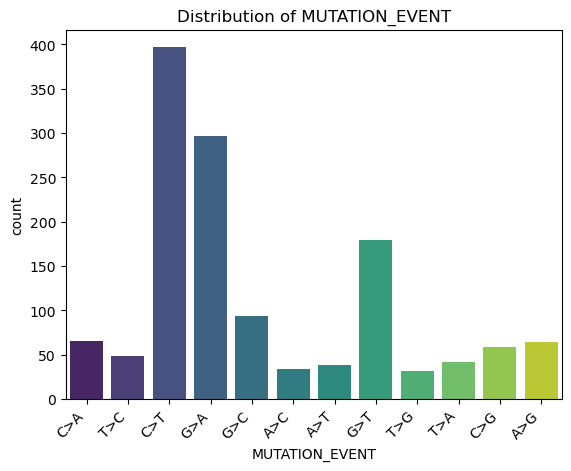

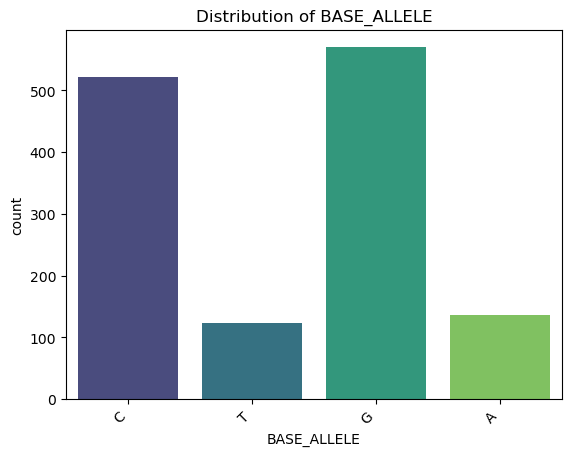

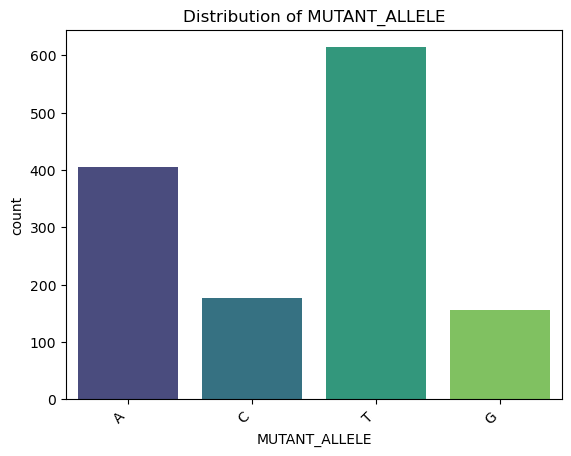

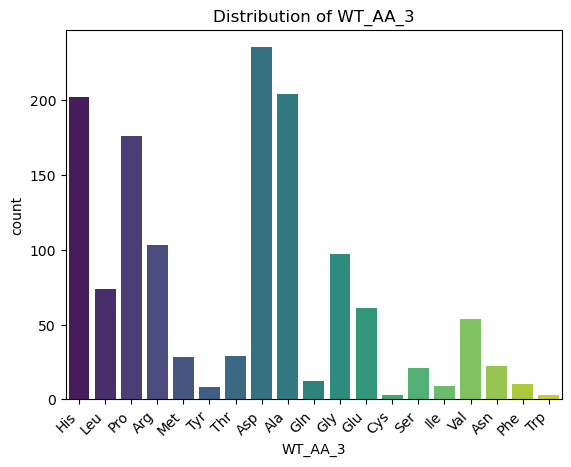

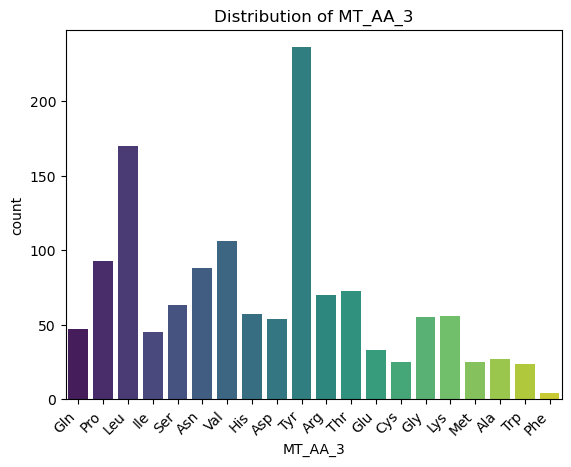

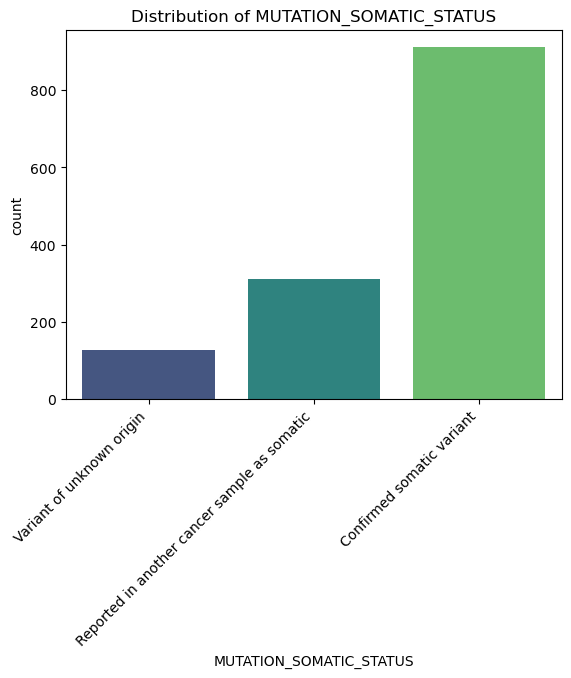

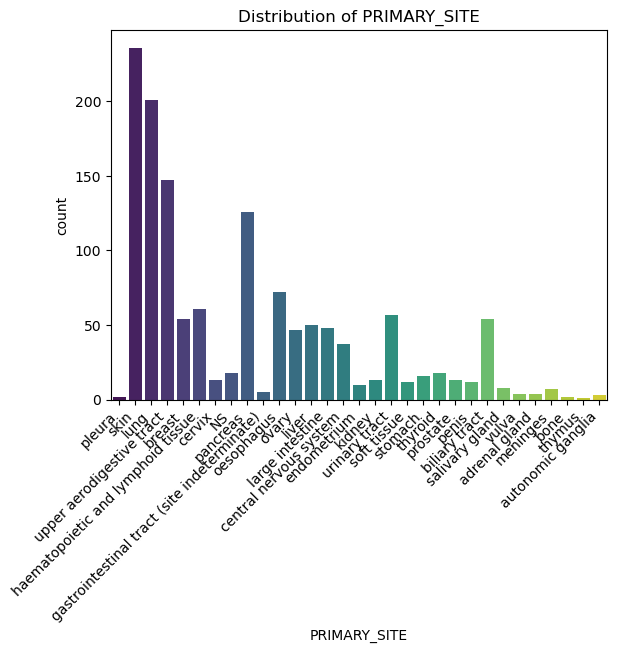

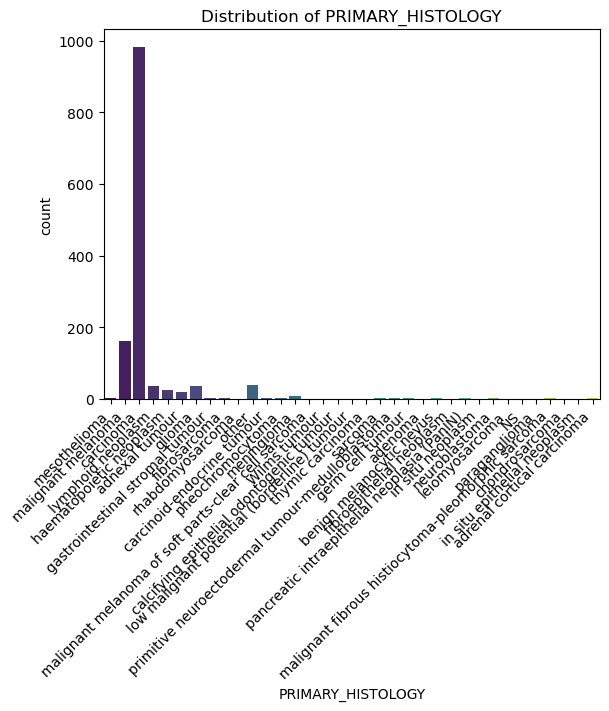

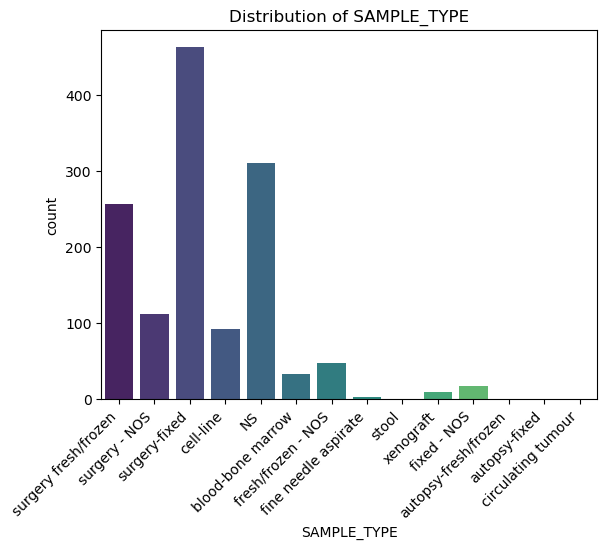

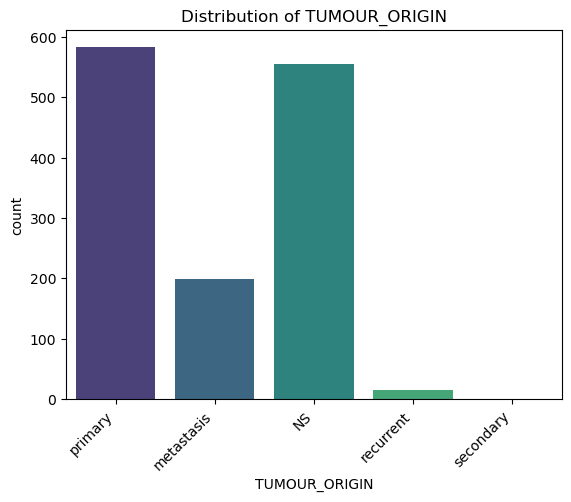

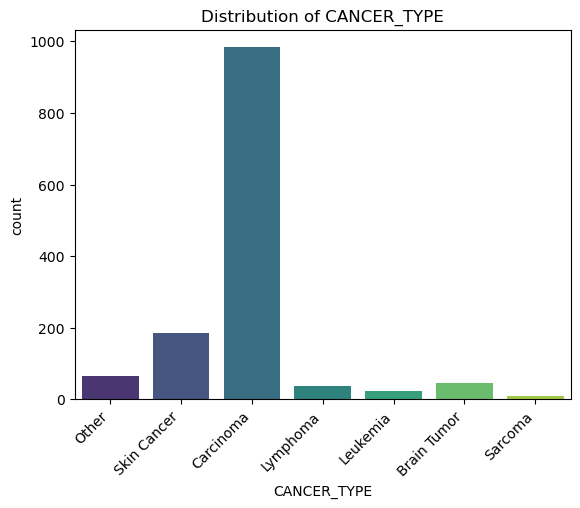

In [7]:
categorical_columns = [col for col in data.columns if col not in [' MUTATION_CDS', 'MUTATION_AA', 'WT_AA_1', 'MT_AA_1'] and data[col].dtype == 'O']

for column in categorical_columns:
    plt.figure()
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

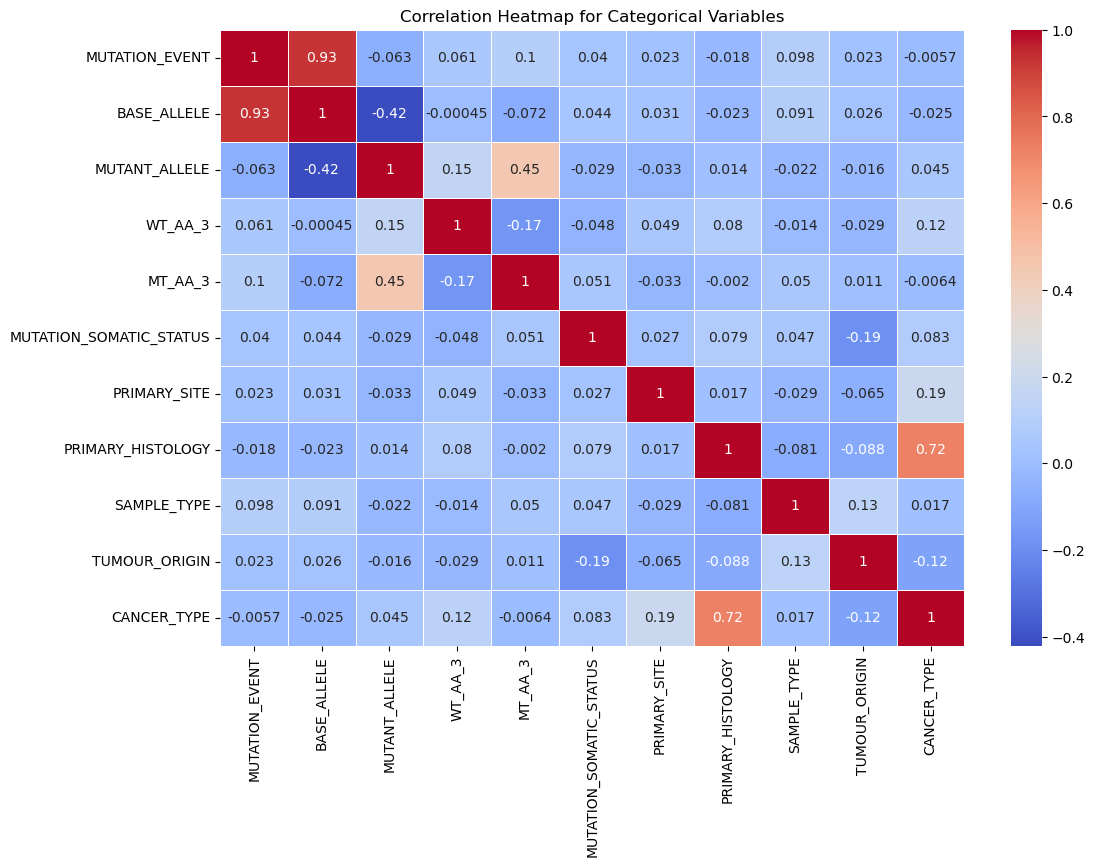

In [8]:
# Correlation heatmap for categorical variables
correlation_matrix = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap for Categorical Variables")
plt.show()

### Other Visualization

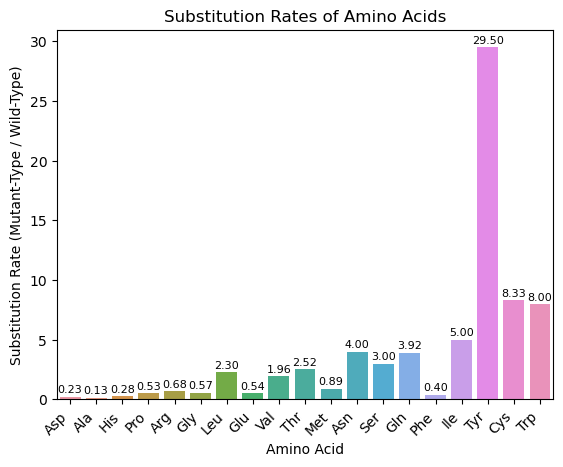

In [9]:
amino_acid_data = data[['WT_AA_3', 'MT_AA_3']]

def calculate_substitution_rates(data):
    wt_counts = data['WT_AA_3'].value_counts()
    mt_counts = data['MT_AA_3'].value_counts()

    substitution_rates = pd.DataFrame({
        'Amino Acid': wt_counts.index,
        'Wild-Type Count': wt_counts.values,
        'Mutant-Type Count': mt_counts.reindex(wt_counts.index, fill_value=0).values
    })
    substitution_rates['Substitution Rate'] = substitution_rates['Mutant-Type Count'] / substitution_rates['Wild-Type Count']

    return substitution_rates

substitution_rates_df = calculate_substitution_rates(amino_acid_data)

plt.figure()
ax = sns.barplot(x='Amino Acid', y='Substitution Rate', data=substitution_rates_df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Substitution Rates of Amino Acids')
plt.xlabel('Amino Acid')
plt.ylabel('Substitution Rate (Mutant-Type / Wild-Type)')
plt.xticks(rotation=45, ha='right')
plt.show()

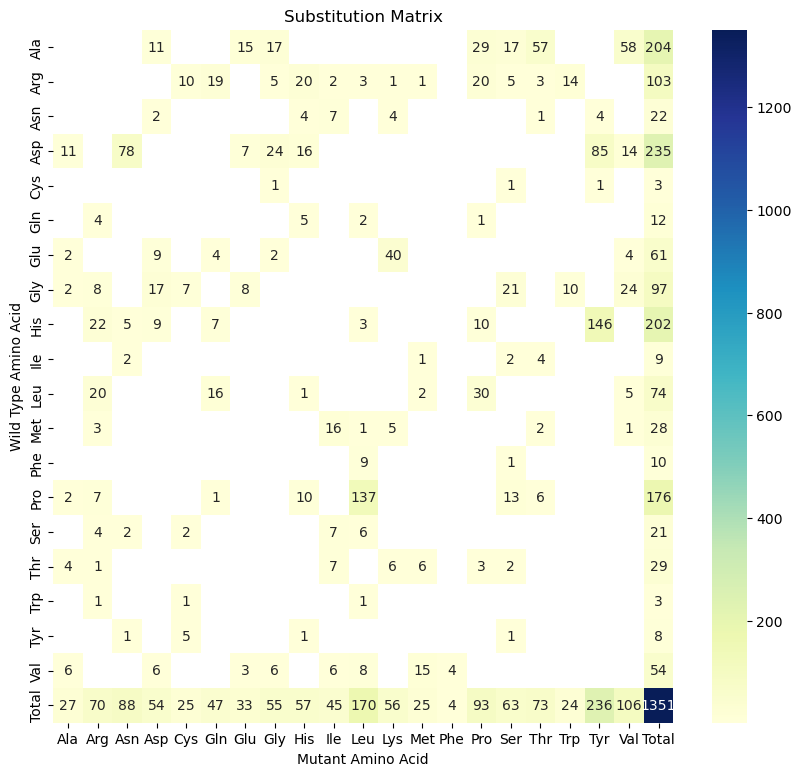

In [10]:
substitution_matrix = pd.crosstab(data['WT_AA_3'], data['MT_AA_3'], margins=True, margins_name='Total')

plt.figure(figsize=(10, 9))
sns.heatmap(substitution_matrix, annot=True, cmap='YlGnBu', fmt='d', cbar=True, mask=(substitution_matrix == 0))
plt.title('Substitution Matrix')
plt.xlabel('Mutant Amino Acid')
plt.ylabel('Wild Type Amino Acid')
plt.show()

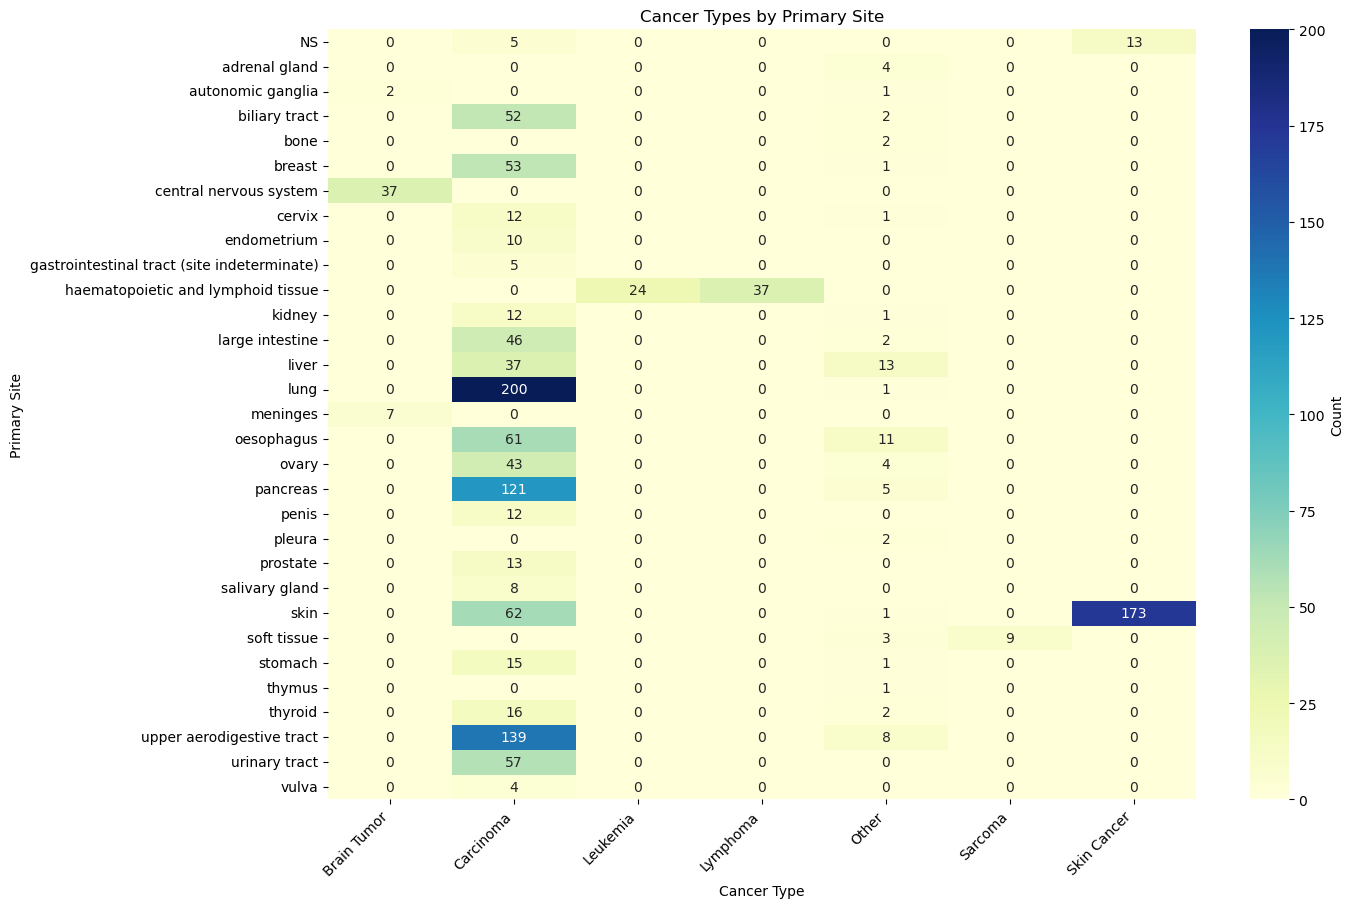

In [11]:
cross_tab = pd.crosstab(data['PRIMARY_SITE'], data['CANCER_TYPE'])

plt.figure(figsize=(14, 10))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Cancer Types by Primary Site')
plt.xlabel('Cancer Type')
plt.ylabel('Primary Site')
plt.xticks(rotation=45, ha='right')
plt.show()